### Header with description

**Improvement from second model:**
* Made the network deeper by adding more layers in place of second max pooling
* Further increased the batch size from 128 to 256
* Added LRScheduler to decrease Learning Rate by 1/10 after every 5 epochs

**What went wrong:**
* Although test accuracy improved, but it is not enough for the goal of this assignment. The model is still overfitting and now I am planning to add dropout
* The test accuracy got stuck at around 99.29-99.30 for few last epochs. The model needs to be more powerful, hence planning to add more layers taking receptive field into consideration
* Addition of LR Scheduler did not help much so is the case with increase in batch size

### Import Libraries and modules

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


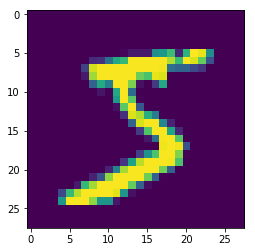

In [18]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [21]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [23]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Checkpoint Configuration to save the best model

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
!pip install -q h5py pyyaml
from keras.models import model_from_json

Using TensorFlow backend.


In [11]:
!ls "/content/gdrive/My Drive/EVA"

S3V2  S4


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/EVA/S4/THIRD/epochs:{epoch:03d}-val_acc:{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')

In [0]:
callbacks_list = [checkpoint]

### Build Model

In [37]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), use_bias=False)) #OutputChannelSize= 26, RF=3x3
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu', use_bias=False)) #OutputChannelSize=24, RF=5x5
model.add(BatchNormalization())
model.add(Convolution2D(25, 3, 3, activation='relu', use_bias=False)) #OutputChannelSize=22, RF=7x7
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #OutputChannelSize=22, RF=7x7
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #OutputChannelSize=11, RF=14x14

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False)) #OutputChannelSize=9, RF=16x16
model.add(BatchNormalization())
model.add(Convolution2D(15, 3, 3, activation='relu', use_bias=False)) #OutputChannelSize=7, RF=18x18
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu', use_bias=False)) #OutputChannelSize=5, RF=20x20
model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) #OutputChannelSize=5, RF=20x20
model.add(BatchNormalization())

model.add(Convolution2D(10, 5, use_bias=False))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (3, 3), activation="relu", use_bias=False)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu", use_

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 20)        1800      
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 20)        80        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 25)        4500      
_________________________________________________________________
batch_normalization_11 (Batc (None, 22, 22, 25)        100       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 10)        250       
__________

### Compile and Train the model

In [0]:
def scheduler(epoch, lr):
  if epoch % 5 == 0:
    lr = lr * 0.1
  return lr

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.05),
             metrics=['accuracy'])

callbacks_list = [LearningRateScheduler(scheduler, verbose=1), checkpoint]

In [41]:
model.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), nb_epoch=40, callbacks=callbacks_list, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.005000000074505806.
60000/60000 [==============================] - 5s 92us/step - loss: 0.1698 - acc: 0.9464 - val_loss: 0.1350 - val_acc: 0.9626

Epoch 00001: val_acc did not improve from 0.98170
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.004999999888241291.
60000/60000 [==============================] - 4s 60us/step - loss: 0.0521 - acc: 0.9839 - val_loss: 0.0590 - val_acc: 0.9797

Epoch 00002: val_acc did not improve from 0.98170
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.004999999888241291.
60000/60000 [==============================] - 4s 60us/step - loss: 0.0409 - acc: 0.9869 - val_loss: 0.0667 - val_acc: 0.9776

Epoch 00003: val_acc did not improve from 0.98170
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.004999999888241291.
60000/60000 [==============================

### Load the best model and evaluate on test data

In [0]:
from keras.models import load_model
# Take the best saved model as printed in the above code block
modelPath = r'/content/gdrive/My Drive/EVA/S4/THIRD/epochs:010-val_acc:0.9817.hdf5'
model = load_model(modelPath)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [32]:
print(score)

[0.05898839666433632, 0.9817]


In [0]:
y_pred = model.predict(X_test)

In [34]:
print(y_pred[:9])
print(y_test[:9])

[[1.73498836e-06 2.73256846e-05 2.34624827e-06 4.14359456e-05
  2.02063831e-07 4.41792918e-06 1.77292350e-08 9.99840021e-01
  1.05142835e-05 7.19964737e-05]
 [2.92756017e-02 6.55315490e-03 9.60803688e-01 2.35364586e-03
  4.57804505e-04 1.30090148e-05 4.38830990e-04 7.47693548e-06
  9.55431751e-05 1.26325119e-06]
 [2.82557608e-06 9.99392629e-01 2.24346013e-06 2.31034596e-06
  8.85787667e-05 8.00386351e-06 1.61484248e-04 1.75715279e-04
  1.10532717e-04 5.56377818e-05]
 [9.97984409e-01 5.64923357e-06 3.75284173e-04 2.46178170e-05
  2.19915310e-05 1.92352003e-04 1.11188204e-03 1.33609701e-05
  1.87992682e-05 2.51785124e-04]
 [4.31602348e-05 1.15625437e-04 2.63749593e-04 7.84216809e-06
  9.99323606e-01 1.34887887e-06 3.27632551e-05 2.79325633e-07
  5.86476574e-07 2.11083796e-04]
 [7.59257136e-06 9.98361409e-01 6.76818217e-06 6.73504201e-06
  2.38480628e-04 1.15484863e-05 6.36280529e-05 9.19234590e-04
  2.02033742e-04 1.82571690e-04]
 [1.83211716e-06 6.45340595e-04 8.80565949e-06 9.10355902e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [36]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_72'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored